In [285]:
#setting up corpora

import nltk
import numpy as np
from nltk.corpus import brown
brown_tagged_sentences=brown.tagged_sents(categories="learned")
brown_sentence=brown.sents(categories="learned")
brown_tagged_words=brown.tagged_words(categories="learned")

In [286]:
%%time
#default tagger

tag=[tag for (word,tag) in  brown_tagged_words]
tag_dis=nltk.FreqDist(tag)
most_common_tag=tag_dis.max()
default_tagger=nltk.DefaultTagger(most_common_tag)
tagged_words=default_tagger.tag(tokens)
print(default_tagger.evaluate(brown_tagged_sentences))

0.16050536593947923
CPU times: user 1.18 s, sys: 24 ms, total: 1.2 s
Wall time: 1.2 s


In [287]:
%%time
#Regexp tagger

patterns = [(r'.*ing$', 'VBG'),(r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'),(r'.*ould$', 'MD'),(r'.*\'s$', 'NN$'),(r'.*s$', 'NNS'),(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),(r'.*', 'NN')]
reg_tagger=nltk.RegexpTagger(patterns)
print(reg_tagger.evaluate(brown_tagged_sentences))

0.22263700738916256
CPU times: user 2.09 s, sys: 24 ms, total: 2.12 s
Wall time: 2.11 s


In [288]:
%%time
#Lookup Tagger with backoff
words=brown.words(categories="learned")
fd=nltk.FreqDist(words)
cfd=nltk.ConditionalFreqDist(brown_tagged_words)
common_words=fd.most_common(10000)
c_tagged_words=dict((word,cfd[word].max()) for (word,count) in common_words )
lookup_tagger = nltk.UnigramTagger(model=c_tagged_words,backoff=nltk.DefaultTagger("NN"))
print(lookup_tagger.evaluate(brown_tagged_sentences))



0.9107032899366643
CPU times: user 1.74 s, sys: 16 ms, total: 1.75 s
Wall time: 1.75 s


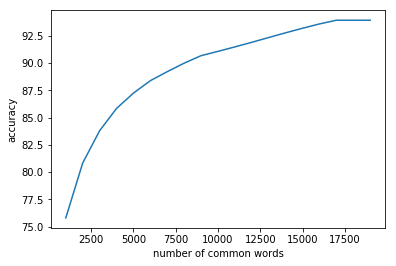

In [289]:
#performace of lookup tagger wrt number of common names
import numpy as np
num_words=np.arange(1000,20000,1000)
acc=np.empty(0)

def perc(c_tagged_words):
    lookup_tagger = nltk.UnigramTagger(model=c_tagged_words,backoff=nltk.DefaultTagger("NN"))
    return lookup_tagger.evaluate(brown_tagged_sentences)

for num_word in num_words:
    common_words=fd.most_common(num_word)
    c_tagged_words=dict((word,cfd[word].max()) for (word,count) in common_words )
    acc=np.append(acc,perc(c_tagged_words)*100)

plt.plot(num_words, acc)
plt.xlabel('number of common words')
plt.ylabel('accuracy')
plt.show()



